In [1]:
import numpy as np
from scipy.stats import sem
from scipy.constants import R
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### NOTES

Predicted log P around 2.1
Predcted DeltaG = -1* 2.1 * (2.3*RT) = -11967.338 J/mol -> -11.967338 kJ/mol


ALOGPs : log P = -1* 1.97 ->  1.97 * (2.3*RT) = -11.23



log P = DeltaG / (2.3*R*T)
DeltaG = DeltaG_octanol - DeltaG_water


#### Paths

In [2]:
## HEADGROUPS ##
Piperazine            = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Piperazine_0/CG_WAT' #Ring with two amines 
amine                 = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine_0/CG_WAT' #Alcohol_link_amine
amine2                = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine2_0/CG_WAT' #Alcohol_link_amine 
KC                    = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/KC_0/CG_WAT' #KC1 - Ketal no linker 
DAP_amine             = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/DAP_amine_0/CG_WAT'  #Amine_two_esters
MC3_amine             = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/MC3_amine_0/MAP3/CG_WAT' #Amine_one_ester
Amine_link_ester      = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine_link_ester_0/CG_WAT' #Amine_link_ester 
Amine_link_ether      = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine_link_ether_0/CG_WAT' #Amine_link_ether 
ether_ring            = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ether_ring_0/MAP3/CG_WAT'#KC2 -ketal with linker 
ether_broken_map2     = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/ether_0/MAP2/CG_WAT' #Amine_two_ethers  
Amine_branched        = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine_branched_0/CG_WAT' #Teritiary amine with two branching tails 
triple_amine          = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/triple_amine_0_0_0/CG_WAT' #maybe add as well
Amine_4_ring          = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Squaramide_0/CG_WAT' 
Amine_carbamate       = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine_carbamate_0/CG_WAT'
Amine_ester_disulfied = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Amine_ester_disulfied_0/CG_WAT'

#Amine carbamate
#Amine ester disulfied 
HEADS = [Piperazine, amine, amine2, KC, DAP_amine, MC3_amine, Amine_link_ester, Amine_link_ether, ether_ring, ether_broken_map2,
        Amine_branched, triple_amine, Amine_4_ring, Amine_carbamate, Amine_ester_disulfied]
HEAD_names = ['Piperazine', 'amine', 'amine2', 'KC', 'DAP_amine', 'MC3_amine', 'Amine_link_ester', 'Amine_link_ether', 'ether_ring', 
               'ether_broken_map2', 'Amine_branched', 'triple_amine', 'Amine_4_ring', 'Amine_carbamate', 'Amine_ester_disulfied']

#PEGylated lipid fragments
ALC             = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/ALC0159_0/CG_WAT' #Pzifer PEGylated lipid Neutral and charged form
DMG             = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/DMG-PEG/CG_WAT'   #Moderna PEGylated lipid

PEGs = [ALC, DMG]
PEG_names = ['ALC','DMG']

## LINKERS ##
Ester_branched3             = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ester_branched/MAP3/CG_WAT' #Goodie
Ester_branched_long_unsat   = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ester_branched_long_unsat_bulk/CG_WAT' #Re-run 
Ester_branched_long_sat     = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ester_branched_long_sat_bulk/CG_WAT' #Re-run
Ether_link_sat              = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ether_link_sat/CG_WAT' #Extend sims, otherwise ok
Ether_link_unsat            = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Ether_link_unsat/CG_WAT' #Extend sims, otherwise ok
SC1_ester_SC1               = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Sc1_ester_Sc1/CG_WAT'
C1_ester_C1                 = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/C1_ester_C1/CG_WAT'
C4h_ester_C4h               = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/C4h_ester_C4h/CG_WAT'
Double_ester_long           = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Double_ester_long/CG_WAT'
Double_ester_branched       = '/data1/lisbeth/Params/FRAGMENTS/AA_SIMS_WATER_IONS/Double_ester_long_branched/CG_WAT'

##Missing linkers:
#Ester disulfied 
#carbamate 

LINKERS = [Ester_branched_long_unsat, Ester_branched_long_sat, Ether_link_sat, Ether_link_unsat, SC1_ester_SC1, C1_ester_C1,
          C4h_ester_C4h, Double_ester_long, Double_ester_branched]
LINKER_names = ['Ester_branched_long_unsat', 'Ester_branched_long_sat', 'Ether_link_sat', 'Ether_link_unsat', 'SC1_ester_SC1', 'C1_ester_C1',
          'C4h_ester_C4h', 'Double_ester_long', 'Double_ester_branched']

In [3]:
fragments = HEADS + LINKERS + PEGs
fragment_labels = HEAD_names + LINKER_names + PEG_names

In [4]:
#Predicted logPs

DeltaG_dir = {'Ester_branched3':[22.05409547,32.36880161,27.69584082,22.45300675,27.29692953,26.3851323,33.85047211],
              'Ester_branched2':[22.05409547,32.36880161,27.69584082,22.45300675,27.29692953,26.3851323,33.85047211],
              'pzifer_ester':[18.74883051,21.4842222,18.80581784,16.35536279,17.32414734,23.70672794], 
              'moderna_ester':[14.2468317,15.27260358,14.36080635,12.99311051,12.42323724,20.45845032], 
              'double_ester':[4.729948123,12.65118655,2.735391686,2.849366339,3.419239607,4.388024162],
              'pzifer_amine':[16.86824873,19.20472913,15.9564515,15.15862892,14.18984437,15.55754021],
              'moderna_amine':[11.68240199,16.58331209,11.85336397,10.71361744,10.88457942,10.59964278],
              'triple_amine':[21.37024754,10.08675684,9.117972285,10.71361744,7.921238423,11.73938932],
              'ether_ring':[24.6755125,24.33358854,21.76915883,15.15862892,22.68095606,21.14229824],
              'ether_broken':[16.29837546,4.388024162,5.641745352,4.160074855,5.755720005],
              'ether_broken_map2':[16.29837546,4.388024162,5.641745352,4.160074855,5.755720005],
              'DAP_amine':[22.16807012,16.24138813,13.56298377,11.9103513,16.01343883,14.18984437], 
              'MC3_amine':[21.99710814,23.36480398,20.6294123,17.438122,20.6294123,24.33358854],
              'ALC':[13.16407249,20.23050101,11.16951605,11.85336397,7.351365155,14.36080635],
              'octane':[16.41235011,29.51943527,19.20472913,23.93467725,15.21561625,26.95500557],
              'amine2':[17.49510932,19.03376715,18.00799526,15.15862892,14.18984437,15.55754021],
              'amine':[22.73794339,21.94012081,22.11108279,19.60364041,17.21017269,20.51543764],
              'Amine_link_ester':[19.83158972,21.14229824,16.8112614,16.18440081,14.474781,16.64029942],
              'Amine_link_ether':[23.70672794,22.11108279,19.03376715,18.91979249,15.72850219,18.86280517],
              'ether_link':[13.27804714,10.65663011,10.37169347,8.719060998,8.14918773,12.48022457],
              'KC':[23.93467725,22.3390321,19.54665309,13.73394575,20.34447566,18.80581784],
              'DMG':[15.27260358,21.99710814,14.36080635,14.13285704,8.662073671,20.51543764],
              'Piperazine':[10.94156674,16.8112614,10.65663011,3.761163568,8.662073671,9.459896246],
              'SC1_ester_SC1':[16.07042615,15.3295909,13.22105981,2.1383006,11.16951605,10.94156674],
              'Ether_link_sat':[32.59675092,21.02832358,29.23449864,23.70672794,19.43267843,23.02288002],
              'Ether_link_unsat':[30.71616914,20.74338695,24.50455052,22.45300675,18.63485586,21.99710814],
              'C1_ester_C1':[21.42723487,18.00799526,18.57786853,16.58331209,14.70273031,15.84247685],
              'C4h_ester_C4h':[20.8573616,18.40690655,16.12741348,16.24138813,15.21561625,16.24138813],
              'Double_ester_long':[23.53576596,22.3390321,21.82614616,18.40690655,15.15862892,21.19928556],
              'Double_ester_branched':[6.838479214,12.1383006,5.983669312,4.274049509,5.299821391,5.698732678],
              'Amine_branched': [22.90890537,20.0025517,21.94012081,18.80581784,17.83703328,16.18440081],
              'Ester_branched_long_sat':[54.82180837,30.37424518,63.1989454,49.92089826,35.38912993,52.37135331],
              'Ester_branched_long_unsat':[50.71872084,31.96989033,52.59930262,47.35646856,34.2493834,50.31980955],
              'Amine_4_ring':[20.97133626,22.45300675,12.70817387,4.046100202,20.51543764], #missing AlogPs
              'Amine_ester_disulfied':[28.83558735,33.05264953,32.93867488,22.96589269,33.22361151], #missing AlogPs
              'Amine_carbamate':[19.83158972,15.84247685,13.16407249,10.08675684,17.26716002]} #missing AlogPs

In [5]:
def read_results (path):
    #For water
    
    #deltaG = G_oct - G_wat

    water_result = open(path+'/TI_WAT/results.txt').readlines()[-1]

    ow = water_result.split()

    ow_DeltaG_all = []
    for i in [1,4,7,10,13,16]:
        ow_DeltaG_all.append(float(ow[i]))

    ow_ava_deltaG = np.average(ow_DeltaG_all)
    ow_sem_deltaG = sem(ow_DeltaG_all)
    ow_MBAR = float(ow[16])
    ow_MBAR_sem = float(ow[18])

    #for octanol

    octanol_result = open(path+'/TI_OCT/results.txt').readlines()[-1]

    oo = octanol_result.split()

    oo_DeltaG_all = []
    for i in [1,4,7,10,13,16]:
        oo_DeltaG_all.append(float(oo[i]))

    oo_ava_deltaG = np.average(oo_DeltaG_all)
    oo_sem_deltaG = sem(oo_DeltaG_all)
    oo_MBAR = float(oo[16])
    oo_MBAR_sem = float(oo[18])

    ddG_mbar = ( oo_MBAR - ow_MBAR ) 
    
    ddG_total = ( oo_ava_deltaG - ow_ava_deltaG )
    ddG_all = ( np.array(oo_DeltaG_all) - np.array( ow_DeltaG_all ))
    
    return ddG_all

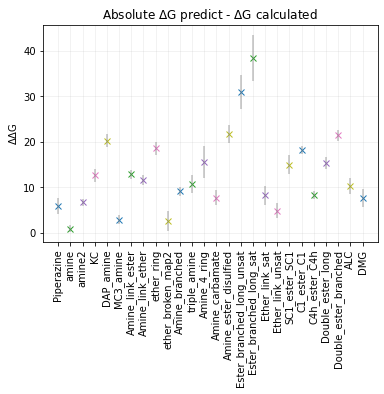

In [6]:
x = []
y = []

for idx, f in enumerate(fragments):
    try:
        calc    = read_results(f)
    except:
        print (fragment_labels[idx])
    predict =  DeltaG_dir[fragment_labels[idx]] 
    
    calc_ava = np.average(calc)
    calc_sem = sem(calc)
    
    predict_ava = np.average(predict)
    predict_sem = sem(predict)
    
    #plt.errorbar(predict_ava, calc_ava, xerr=predict_sem)
    #plt.plot(predict_ava, calc_ava, 'x', label=fragment_labels[idx])
    plt.plot(idx, np.absolute(predict_ava-calc_ava), 'x', label=fragment_labels[idx])
    plt.errorbar(idx, np.absolute(predict_ava-calc_ava), yerr=predict_sem, ecolor='grey', alpha=0.5)
    x.append(idx)
    y.append(np.absolute(predict_ava-calc_ava))
    
plt.xticks(ticks=range(len(fragment_labels)), labels=fragment_labels, rotation=90)
#plt.xlabel('Predicted $\Delta$G')
plt.ylabel('$\Delta$$\Delta$G')

plt.grid(alpha=0.2)

plt.title('Absolute $\Delta$G predict - $\Delta$G calculated')

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.savefig('Solvation_free_energies_diff.png', dpi=300, bbox_inches='tight')
plt.savefig('Solvation_free_energies_diff.pdf', dpi=300, bbox_inches='tight')
plt.show()

The fragments with ester groups is the worst

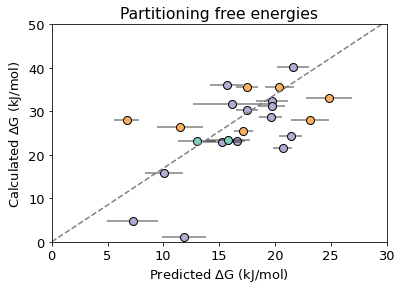

In [7]:
plt.rcParams.update({'font.size': 13})

color_list = ['#b2abd2','#fdae61','#80cdc1'] 

PA = []
CA = []
for idx, f in enumerate(HEADS):
    try:
        calc    = read_results(f)
    except:
        print (HEAD_names[idx])
    predict =  DeltaG_dir[HEAD_names[idx]] 
    
    calc_ava = np.average(calc)
    CA.append(calc_ava)
    calc_sem = sem(calc)
    
    predict_ava = np.average(predict)
    PA.append(predict_ava)
    predict_sem = sem(predict)
    
    plt.errorbar(predict_ava, calc_ava, xerr=predict_sem, yerr=calc_sem, ecolor='black', alpha=0.5)
    plt.plot(predict_ava, calc_ava, 'o', label=fragment_labels[idx], ms=8, color=color_list[0], mec='black')
    
for idx, f in enumerate(LINKERS):
    try:
        calc    = read_results(f)
    except:
        print (LINKER_names[idx])
    predict =  DeltaG_dir[LINKER_names[idx]] 
    
    calc_ava = np.average(calc)
    CA.append(calc_ava)
    calc_sem = sem(calc)
    
    predict_ava = np.average(predict)
    PA.append(predict_ava)
    predict_sem = sem(predict)
    
    plt.errorbar(predict_ava, calc_ava, xerr=predict_sem, yerr=calc_sem, ecolor='black', alpha=0.5)
    plt.plot(predict_ava, calc_ava, 'o', label=fragment_labels[idx], ms=8, color=color_list[1], mec='black')

for idx, f in enumerate(PEGs):
    try:
        calc    = read_results(f)
    except:
        print (PEG_names[idx])
    predict =  DeltaG_dir[PEG_names[idx]] 
    
    calc_ava = np.average(calc)
    CA.append(calc_ava)
    calc_sem = sem(calc)
    
    predict_ava = np.average(predict)
    PA.append(predict_ava)
    predict_sem = sem(predict)
    
    plt.errorbar(predict_ava, calc_ava, xerr=predict_sem, yerr=calc_sem, ecolor='black', alpha=0.5)
    plt.plot(predict_ava, calc_ava, 'o', label=fragment_labels[idx], ms=8, color=color_list[2], mec='black')

    
linr_model = LinearRegression().fit(np.array(PA).reshape(-1, 1), np.array(CA).reshape(-1, 1))
a= linr_model.coef_[0]
b = linr_model.intercept_
X = np.linspace(0, np.max(PA)+5, 10)
Y = a*X+0

plt.plot(X, Y, linestyle='--', color='grey')
    
plt.xlabel('Predicted $\Delta$G (kJ/mol)' )
plt.ylabel('Calculated $\Delta$G (kJ/mol)')

plt.ylim(0,50)
plt.xlim(0,30)

plt.title('Partitioning free energies')

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.savefig('Solvation_free_energies.png', dpi=300, bbox_inches='tight')
plt.savefig('Solvation_free_energies.pdf', dpi=300, bbox_inches='tight')
plt.show()

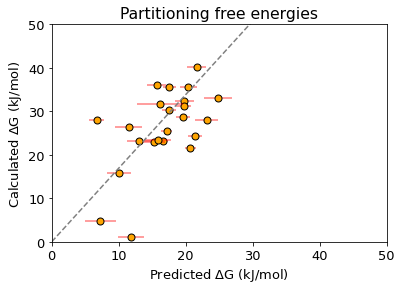

In [8]:
plt.rcParams.update({'font.size': 13})

PA = []
CA = []
for idx, f in enumerate(fragments):
    try:
        calc    = read_results(f)
    except:
        print (fragment_labels[idx])
    predict =  DeltaG_dir[fragment_labels[idx]] 
    
    calc_ava = np.average(calc)
    CA.append(calc_ava)
    calc_sem = sem(calc)
    
    predict_ava = np.average(predict)
    PA.append(predict_ava)
    predict_sem = sem(predict)
    
    plt.errorbar(predict_ava, calc_ava, xerr=predict_sem, yerr=calc_sem, ecolor='red', alpha=0.5)
    plt.plot(predict_ava, calc_ava, 'o', label=fragment_labels[idx], ms=7, color='orange', mec='black')
    
linr_model = LinearRegression().fit(np.array(PA).reshape(-1, 1), np.array(CA).reshape(-1, 1))
a= linr_model.coef_[0]
b = linr_model.intercept_
X = np.linspace(0, np.max(PA)+5, 10)
Y = a*X+0

plt.plot(X, Y, linestyle='--', color='grey')
    
plt.xlabel('Predicted $\Delta$G (kJ/mol)' )
plt.ylabel('Calculated $\Delta$G (kJ/mol)')

plt.ylim(0,50)
plt.xlim(0,50)

plt.title('Partitioning free energies')

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.savefig('Solvation_free_energies_HEADS.png', dpi=300, bbox_inches='tight')
plt.savefig('Solvation_free_energies_HEADS.pdf', dpi=300, bbox_inches='tight')
plt.show()

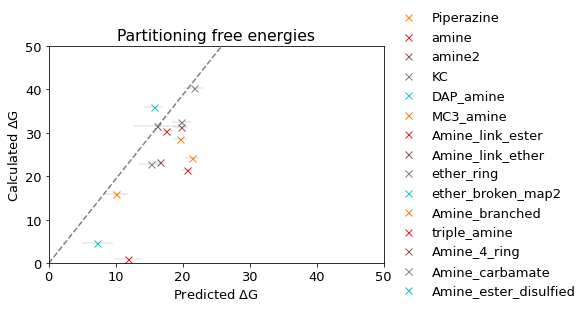

In [9]:
PA = []
CA = []
for idx, f in enumerate(HEADS):
    try:
        calc    = read_results(f)
    except:
        print (HEAD_names[idx])
    predict =  DeltaG_dir[HEAD_names[idx]] 
    
    calc_ava = np.average(calc)
    CA.append(calc_ava)
    calc_sem = sem(calc)
    
    predict_ava = np.average(predict)
    PA.append(predict_ava)
    predict_sem = sem(predict)
    
    plt.errorbar(predict_ava, calc_ava, xerr=predict_sem, yerr=calc_sem, ecolor='grey', alpha=0.2)
    plt.plot(predict_ava, calc_ava, 'x', label=HEAD_names[idx], ms=7)
    
linr_model = LinearRegression().fit(np.array(PA).reshape(-1, 1), np.array(CA).reshape(-1, 1))
a= linr_model.coef_[0]
b = linr_model.intercept_
X = np.linspace(0, np.max(PA)+5, 10)
Y = a*X+0

plt.plot(X, Y, linestyle='--', color='grey')
    
plt.xlabel('Predicted $\Delta$G')
plt.ylabel('Calculated $\Delta$G')

plt.ylim(0,50)
plt.xlim(0,50)

plt.title('Partitioning free energies')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
#plt.savefig('Solvation_free_energies.png', dpi=300, bbox_inches='tight')
#plt.savefig('Solvation_free_energies.pdf', dpi=300, bbox_inches='tight')
plt.show()

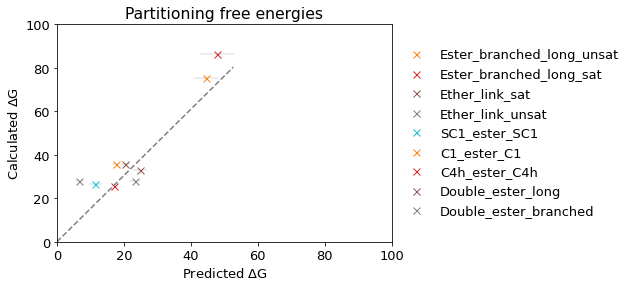

In [10]:
PA = []
CA = []
for idx, f in enumerate(LINKERS):
    try:
        calc    = read_results(f)
    except:
        print (LINKER_names[idx])
    predict =  DeltaG_dir[LINKER_names[idx]] 
    
    calc_ava = np.average(calc)
    CA.append(calc_ava)
    calc_sem = sem(calc)
    
    predict_ava = np.average(predict)
    PA.append(predict_ava)
    predict_sem = sem(predict)
    
    plt.errorbar(predict_ava, calc_ava, xerr=predict_sem, yerr=calc_sem, ecolor='grey', alpha=0.2)
    plt.plot(predict_ava, calc_ava, 'x', label=LINKER_names[idx], ms=7)
    
linr_model = LinearRegression().fit(np.array(PA).reshape(-1, 1), np.array(CA).reshape(-1, 1))
a= linr_model.coef_[0]
b = linr_model.intercept_
X = np.linspace(0, np.max(PA)+5, 10)
Y = a*X+0

plt.plot(X, Y, linestyle='--', color='grey')
    
plt.xlabel('Predicted $\Delta$G')
plt.ylabel('Calculated $\Delta$G')

plt.ylim(0,100)
plt.xlim(0,100)

plt.title('Partitioning free energies')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
#plt.savefig('Solvation_free_energies.png', dpi=300, bbox_inches='tight')
#plt.savefig('Solvation_free_energies.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
calc    = read_results(Ester_branched_long_unsat)
predict =  DeltaG_dir['Ester_branched_long_unsat']  
    
print(np.average(calc))
print(np.average(predict))

print(np.average(predict)-np.average(calc))

75.52016666666667
44.535595883333336
-30.984570783333332
